In [228]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import pylab 

In [229]:
boston = load_boston()

c:\Users\asus10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

In [230]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

data： 每個房子的資訊   target： 每個房子的價格 feature_names： 每個房子的特徵  DESCR： 這個資料集的描述

In [231]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [232]:
x = boston.data
y = boston.target

In [233]:
df = pd.DataFrame(x, columns=boston.feature_names)
df['Target'] = pd.DataFrame(y, columns=['Target'])

In [234]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [235]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


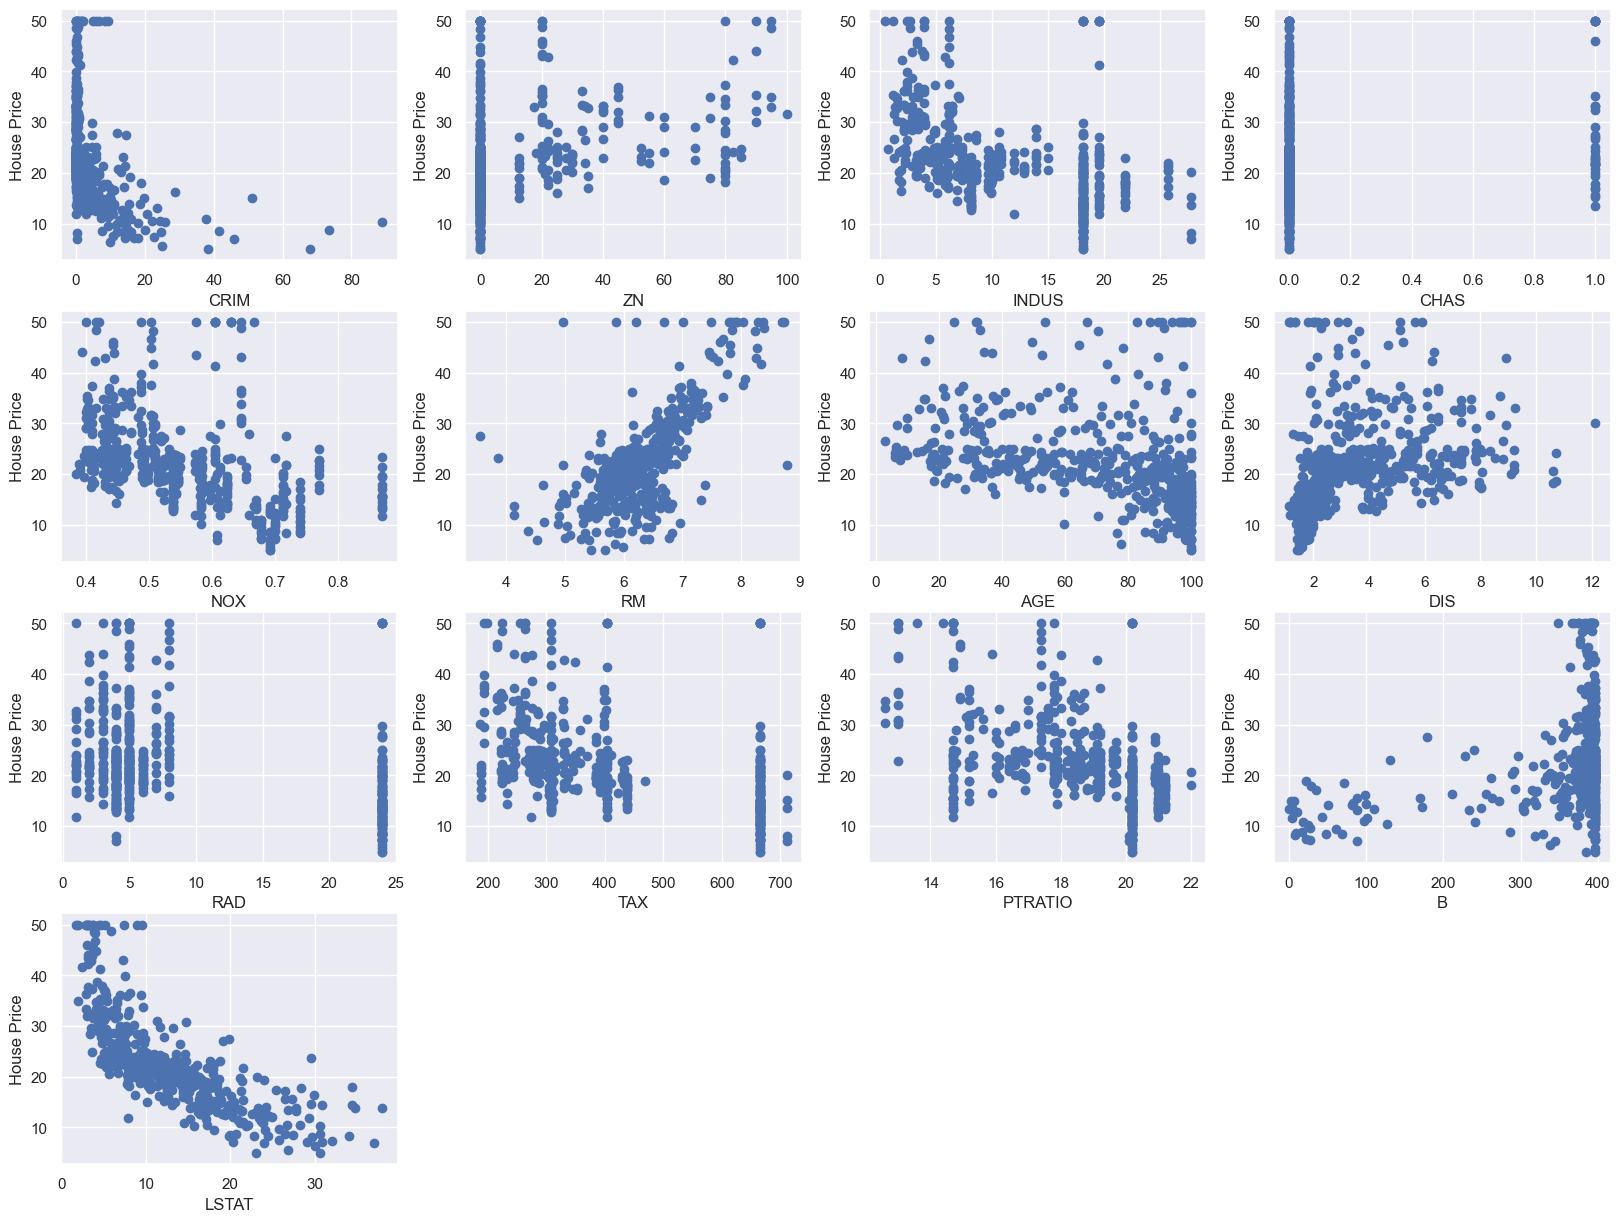

In [265]:
plt.figure(figsize=(20, 15))
features = df.drop('Target', axis=1)
for i, col in enumerate(features.columns):
    plt.subplot(4, 4, i + 1)
    x = df[col]
    y = df['Target']
    plt.plot(x, y, 'o')
    plt.xlabel(col)
    plt.ylabel('House Price')
plt.show()

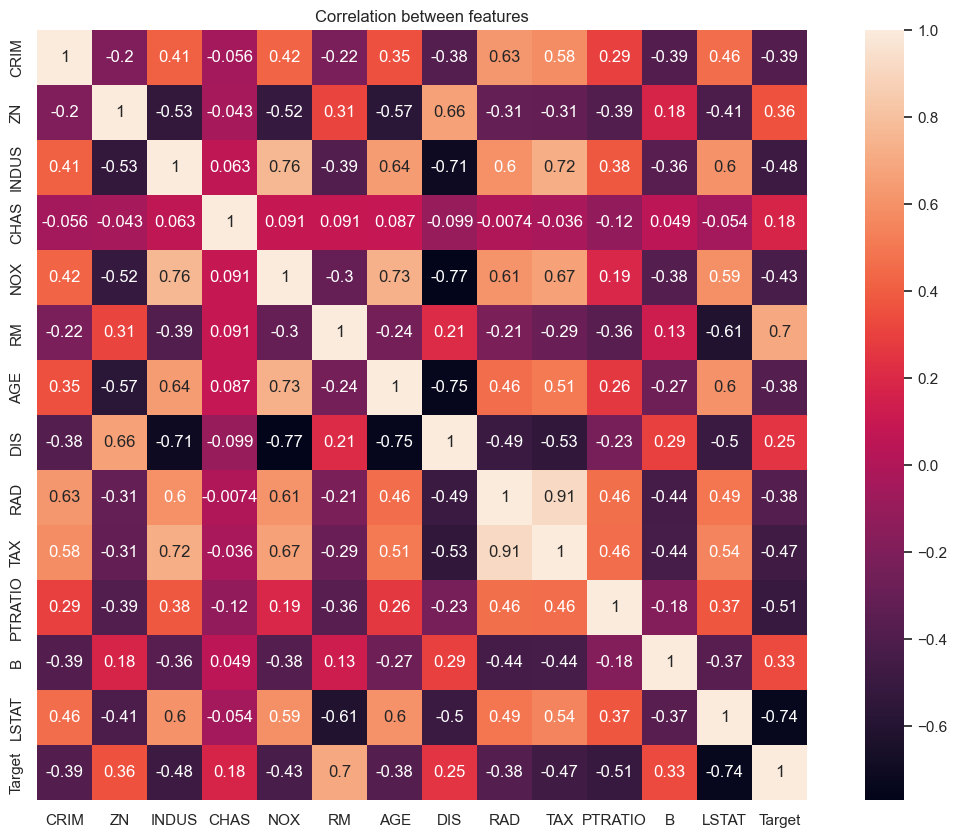

In [237]:
plt.figure(figsize=(15,10))
plt.title('Correlation between features')
sns.heatmap(df.corr(), annot=True, square=True)
plt.show()

C:\Users\asus10\AppData\Local\Temp\ipykernel_10072\1757871485.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Target"])


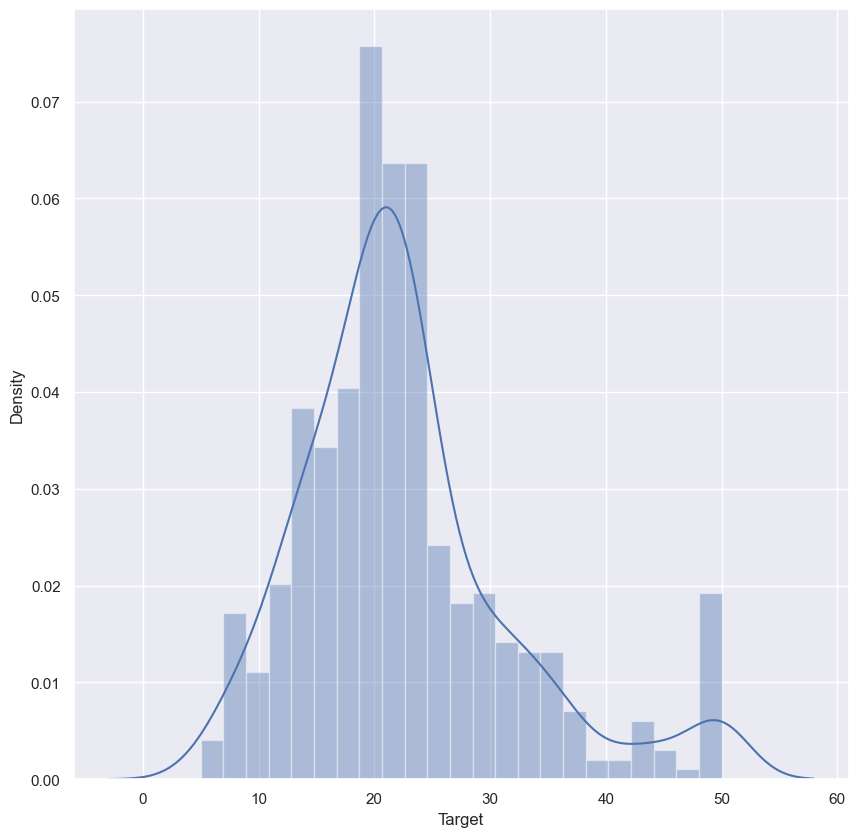

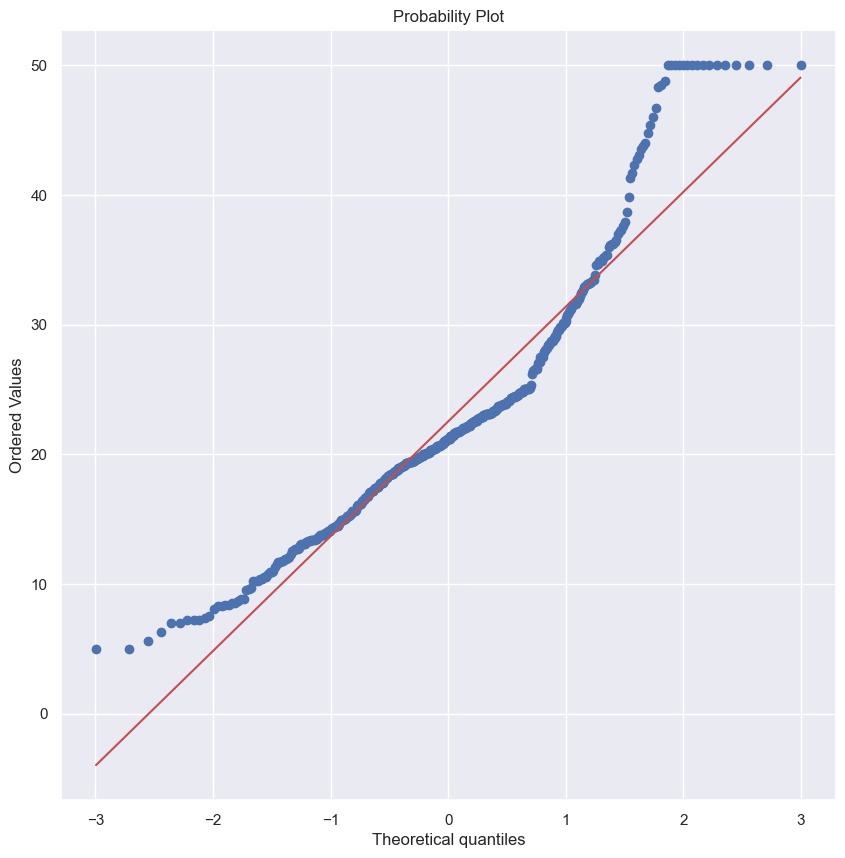

In [238]:
sns.distplot(df["Target"])
plt.show()
stats.probplot(df['Target'], plot=pylab)
pylab.show()

In [239]:
from sklearn.model_selection import train_test_split # 切割資料
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5) # 將數據分成73比

In [240]:
# 創建模型
model = LinearRegression()
model.fit(x_train, y_train) # 將資料拿去訓練

LinearRegression()

In [241]:
pred = model.predict(x_test)
# 印出結果
pd.DataFrame({
    'actual_y': y_test,
    'pred_y': pred
})

,actual_y,pred_y
0,37.6,37.389977
1,27.9,31.567942
2,22.6,27.133739
3,13.8,6.551176
4,35.2,33.693108
...,...,...
147,18.7,18.233055
148,19.8,22.297444
149,22.5,29.326672
150,13.3,13.607667


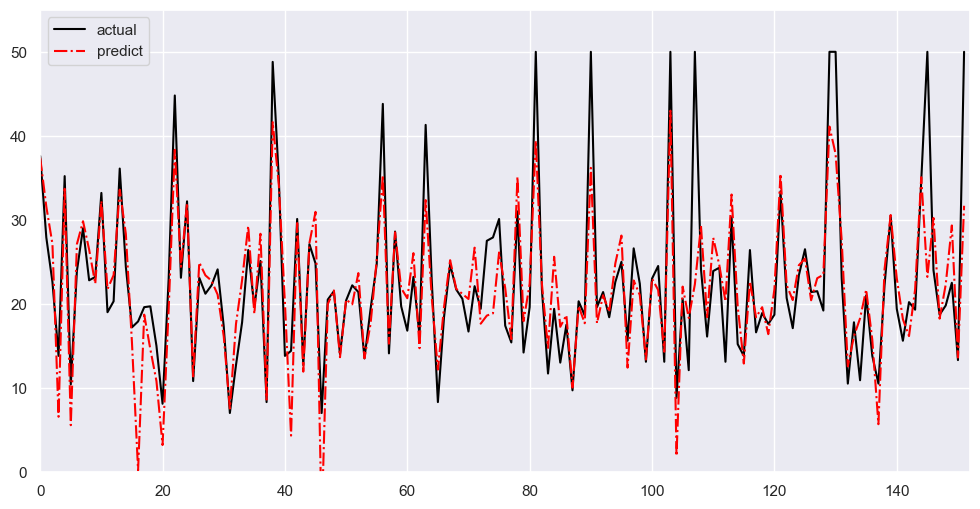

In [242]:
# 預測結果可視化
fig = plt.figure(figsize=(12,6))
y_test_index = np.arange(y_test.shape[0])
pred_index = np.arange(pred.shape[0])
plt.plot(y_test_index, y_test, color='black', linestyle='-', linewidth=1.5)
plt.plot(pred_index, pred, color='red', linestyle='-.', linewidth=1.5)
plt.xlim((0,152))
plt.ylim((0,55))
plt.legend(['actual','predict'])
plt.show()

In [243]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# 印出預測績效(R-square)
print(f'Linear Regression\'s score: {model.score(x_test, y_test)}')
# 印出其他迴歸績效指標

pd.DataFrame({
    'R-square': [r2_score(y_test, pred)],
    'MAE': [mean_absolute_error(y_test, pred)],
    'MSE': [mean_squared_error(y_test, pred)],
    'RMSE': [mean_squared_error(y_test, pred, squared=False)]
},index=['value'])

Linear Regression's score: 0.6771696999851696


,R-square,MAE,MSE,RMSE
value,0.67717,3.557668,30.697038,5.540491
